In [3]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [5]:
filename = "3.png"
#filename = "original.png"
image = cv2.imread(filename)

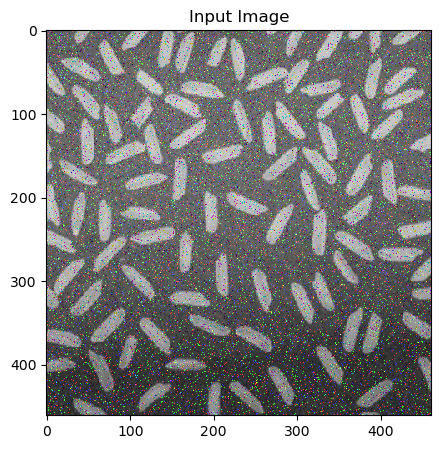

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.show()

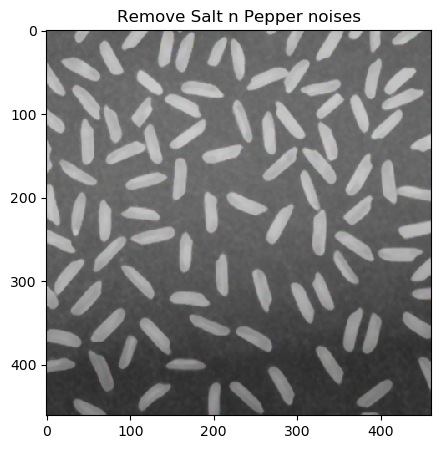

In [7]:
# remove salt and pepper noise
image_blur = cv2.medianBlur(image,5)

plt.figure(figsize=(5,5))
plt.imshow(image_blur, cmap = 'gray')
plt.title('Remove Salt n Pepper noises')
plt.show()

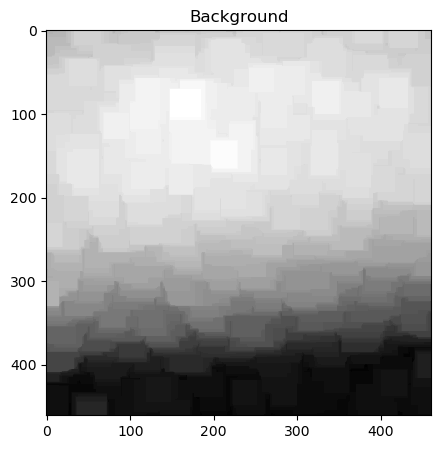

In [8]:
image_blur = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

# extract background
kernel = np.ones((29,29),np.uint8)
background = cv2.morphologyEx(image_blur,cv2.MORPH_OPEN,kernel) 

plt.figure(figsize=(5,5))
plt.imshow(background, cmap = 'gray')
plt.title('Background')
plt.show()

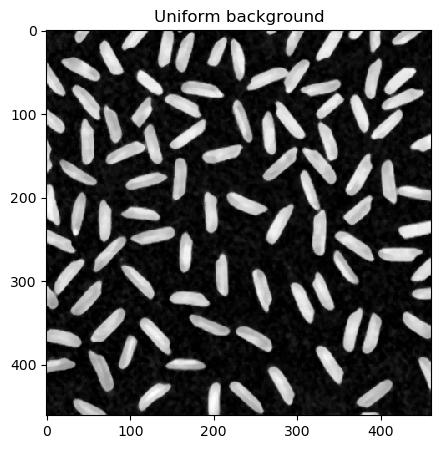

In [9]:
# correct non-uniform illumination
image_uniform_background = image_blur - background

plt.figure(figsize=(5,5))
plt.imshow(image_uniform_background, cmap = 'gray')
plt.title('Uniform background')
plt.show()

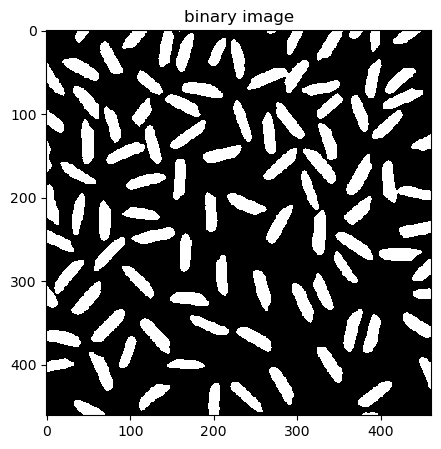

In [10]:
_ ,image_thresh = cv2.threshold(image_uniform_background,60,255,cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(image_thresh, cmap = 'gray')
plt.title("binary image")
plt.show()

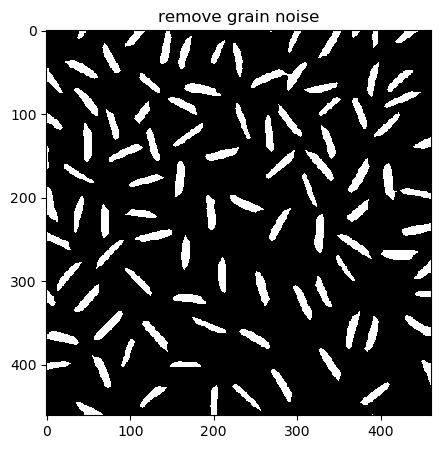

In [11]:
# xoá nhiễu hạt và làm rời các đối tượng
kernel = np.ones((5,5),np.uint8)
image_remove_grain_noise = cv2.morphologyEx(image_thresh,cv2.MORPH_ERODE,kernel)

plt.figure(figsize=(5,5))
plt.imshow(image_remove_grain_noise, cmap = 'gray')
plt.title("remove grain noise")
plt.show()

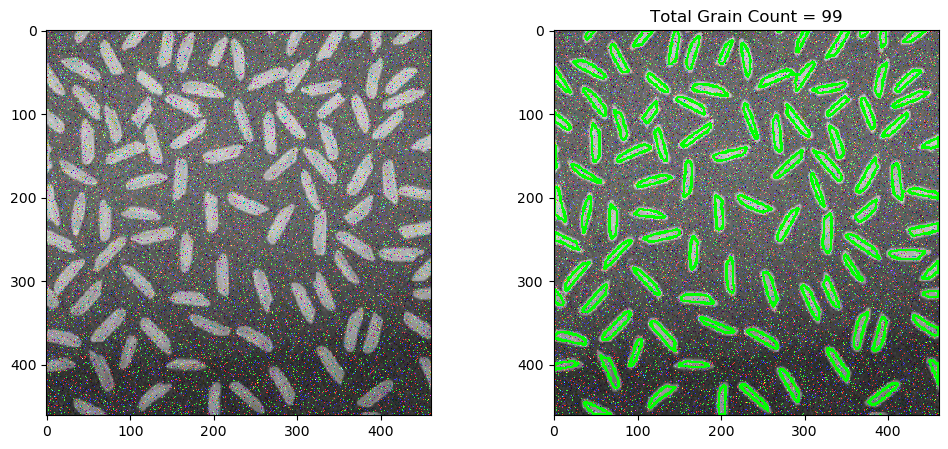

In [12]:
image_final = image_remove_grain_noise

cnts = cv2.findContours(image_final.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread(filename)
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))

for (i, c) in enumerate(cnts):
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))